In [2]:
import os
import numpy as np
from tqdm import tqdm


# Function to load data from a directory
def load_data(base_dir):
    gt_data = {}
    pred_data = {}

    # Walk through all subdirectories and files
    for root, _, files in tqdm(os.walk(base_dir)):
        for file in files:
            if file.endswith("_gt.npy") or file.endswith("_pred.npy"):
                # Extract information from the file path and name
                relative_path = os.path.relpath(root, base_dir)
                subject, action = relative_path.split(os.sep)[:2]
                file_id = file.split("_")[0]

                # Load the numpy file
                file_path = os.path.join(root, file)
                try:
                    data_array = np.load(file_path)
                except Exception as e:
                    print(f"Failed to load {file_path}: {e}")
                    continue

                # Create dictionary key
                data_key = f"{subject}/{action}/{file_id}"

                # Store ground truth and prediction data
                if file.endswith("_gt.npy"):
                    gt_data[data_key] = data_array[0]
                else:
                    pred_data[data_key] = data_array[0]

    return gt_data, pred_data


# Example usage
base_directory = "output/MIA/transformer/4_trans_layers_256_width_28frames/muscle_activation/transformer/val"
gt_data, pred_data = load_data(base_directory)

# Print out some data to verify
for key in gt_data:
    print(f"GT {key}: {gt_data[key].shape}")
for key in pred_data:
    print(f"Pred {key}: {pred_data[key].shape}")

92it [00:11,  8.43it/s]

Failed to load output/MIA/transformer/4_trans_layers_256_width_28frames/muscle_activation/transformer/val/Subject4/JumpingJack/124_3051_pred.npy: No data left in file


145it [00:17,  8.27it/s]

GT Subject3/HighKick/221: (28, 8)
GT Subject3/HighKick/213: (28, 8)
GT Subject3/HighKick/211: (28, 8)
GT Subject3/HighKick/209: (28, 8)
GT Subject3/HighKick/215: (28, 8)
GT Subject3/HighKick/222: (28, 8)
GT Subject3/HighKick/226: (28, 8)
GT Subject3/HighKick/214: (28, 8)
GT Subject3/HighKick/224: (28, 8)
GT Subject3/HighKick/223: (28, 8)
GT Subject3/HighKick/225: (28, 8)
GT Subject3/HighKick/207: (28, 8)
GT Subject3/HighKick/212: (28, 8)
GT Subject3/HighKick/218: (28, 8)
GT Subject3/HighKick/217: (28, 8)
GT Subject3/HighKick/210: (28, 8)
GT Subject3/HighKick/219: (28, 8)
GT Subject3/HighKick/208: (28, 8)
GT Subject3/HighKick/220: (28, 8)
GT Subject3/HighKick/216: (28, 8)
GT Subject3/HookPunch/304: (28, 8)
GT Subject3/HookPunch/300: (28, 8)
GT Subject3/HookPunch/294: (28, 8)
GT Subject3/HookPunch/289: (28, 8)
GT Subject3/HookPunch/291: (28, 8)
GT Subject3/HookPunch/295: (28, 8)
GT Subject3/HookPunch/296: (28, 8)
GT Subject3/HookPunch/298: (28, 8)
GT Subject3/HookPunch/299: (28, 8)
GT Su

In [1]:
from musint.benchmarks.muscle_sets import MUSCLE_SUBSETS

MUSINT_402 = MUSCLE_SUBSETS["MUSINT_402"]

MIA_MUSCLES = [
    "quadriceps_femoris_l",
    "hamstring_l",
    "lateral_l",
    "biceps_l",
    "quadriceps_femoris_r",
    "hamstring_r",
    "lateral_r",
    "biceps_r",
]


MIA_SUBSET = [
    [("quadriceps_femoris_l", 1.0)],
    [("hamstring_l", 1.0)],
    [("quadriceps_femoris_r", 1.0)],
    [("hamstring_r", 1.0)],
]


MUSINT_SUBSET = [
    [("LU_recfem_l", 1.0)],
    [("LU_bflh_l", 1.0)],
    [("LU_recfem_r", 1.0)],
    [("LU_bflh_r", 1.0)],
]

SyntaxError: '[' was never closed (3265049254.py, line 16)

In [5]:
import pandas as pd

gt_data_match = {k: pd.DataFrame(v, columns=MIA_MUSCLES)[MIA_SUBSET] for k, v in gt_data.items()}
pred_data_n = {k: pd.DataFrame(v, columns=MUSINT_402) for k, v in pred_data.items()}
pred_data_match = {k: v[MUSINT_SUBSET] for k, v in pred_data_n.items()}

In [6]:
# Define the mappings for averaging
average_mapping = {
    "quadriceps_femoris_l": ["LU_recfem_l", "LU_vasint_l", "LU_vaslat_l", "LU_vasmed_l"],
    "hamstring_l": ["LU_bflh_l", "LU_bfsh_l", "LU_semimem_l", "LU_semiten_l"],
    "quadriceps_femoris_r": ["LU_recfem_r", "LU_vasint_r", "LU_vaslat_r", "LU_vasmed_r"],
    "hamstring_r": ["LU_bflh_r", "LU_bfsh_r", "LU_semimem_r", "LU_semiten_r"],
}


# Function to average the selected columns in predictions
def average_predictions(pred_data, average_mapping):
    averaged_pred_data = {}
    for key, df in pred_data.items():
        averaged_df = pd.DataFrame()
        for muscle, columns in average_mapping.items():
            averaged_df[muscle] = df[columns].mean(axis=1)
        averaged_pred_data[key] = averaged_df
    return averaged_pred_data

In [7]:
avg_pred = average_predictions(pred_data_n, average_mapping)

In [10]:
avg_pred[next(iter(avg_pred))]

,quadriceps_femoris_l,hamstring_l,quadriceps_femoris_r,hamstring_r
0,0.153353,0.009000,0.053759,0.071739
1,0.160313,0.003606,0.051054,0.075192
2,0.176326,0.011417,0.057864,0.065111
3,0.198035,0.013216,0.067740,0.076050
4,0.141274,0.015765,0.044179,0.085373
5,0.057285,0.028482,0.019495,0.075793
6,0.029642,0.033985,0.014118,0.062840
7,0.035544,0.026596,0.013386,0.054839
8,0.054110,0.020597,0.017170,0.048279
9,0.064898,0.018336,0.027096,0.036737


In [54]:
import matplotlib.pyplot as plt


def plot_muscle_activation(gt_data_match, pred_data_match, keys, mia_subset):
    for key in keys:
        gt_df = gt_data_match[key]
        pred_df = pred_data_match[key]

        pred_df = pred_df.rolling(window=10, center=True).mean().fillna(method="bfill").fillna(method="ffill")

        fig, axs = plt.subplots(len(mia_subset), 1, figsize=(10, 15))
        fig.suptitle(f"Muscle Activation Comparison for {key}", fontsize=16)

        for i, muscle in enumerate(mia_subset):
            axs[i].plot(gt_df.iloc[:, i], label="Ground Truth")
            axs[i].plot(pred_df.iloc[:, i] * 4, label="Prediction")
            axs[i].set_title(muscle)
            axs[i].set_xlabel("Timesteps")
            axs[i].set_ylabel("Activation")
            axs[i].legend()

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

In [73]:
import matplotlib.pyplot as plt


def plot_muscle_activation(gt_data_match, pred_data_match, keys, mia_subset):
    fig, axs = plt.subplots(len(mia_subset), 1, figsize=(10, 15))
    fig.suptitle("Muscle Activation Comparison", fontsize=16)

    for i, muscle in enumerate(mia_subset):
        for key in keys:
            gt_df = gt_data_match[key]
            pred_df = pred_data_match[key]

            # Apply smoothing to predictions
            pred_df = pred_df.rolling(window=10, center=True).mean().fillna(method="bfill").fillna(method="ffill")

            # Overlay plots for each sample
            axs[i].plot(gt_df[muscle], label=f"Ground Truth {key}" if key == keys[0] else "", color="blue", alpha=0.2)
            axs[i].plot(
                pred_df[muscle] * 6, label=f"Prediction {key}" if key == keys[0] else "", color="orange", alpha=0.2
            )

        axs[i].set_title(muscle)
        axs[i].set_xlabel("Timesteps")
        axs[i].set_ylabel("Activation")
        axs[i].legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [81]:
import matplotlib.pyplot as plt
import numpy as np


def plot_muscle_activation(gt_data_match, pred_data_match, keys, mia_subset):
    fig, axs = plt.subplots(len(mia_subset), 1, figsize=(10, 15))
    fig.suptitle("Muscle Activation Comparison", fontsize=16)

    for i, muscle in enumerate(mia_subset):
        gt_all = []
        pred_all = []

        for key in keys:
            gt_df = gt_data_match[key]
            pred_df = pred_data_match[key]

            # Apply smoothing to predictions
            pred_df = pred_df.rolling(window=10, center=True).mean().fillna(method="bfill").fillna(method="ffill")
            pred_df = pred_df * 4
            # Collect data for averaging
            gt_all.append(gt_df[muscle].values)
            pred_all.append(pred_df[muscle].values)

        # Convert to numpy arrays for easy manipulation
        gt_all = np.array(gt_all)
        pred_all = np.array(pred_all)

        # Calculate mean and standard deviation
        gt_mean = np.mean(gt_all, axis=0)
        gt_std = np.std(gt_all, axis=0)
        pred_mean = np.mean(pred_all, axis=0)
        pred_std = np.std(pred_all, axis=0)

        # Plot mean with standard deviation hose
        axs[i].plot(gt_mean, label="Ground Truth Mean", color="blue")
        axs[i].fill_between(range(len(gt_mean)), gt_mean - gt_std, gt_mean + gt_std, color="blue", alpha=0.2)
        axs[i].plot(pred_mean, label="Prediction Mean", color="orange")
        axs[i].fill_between(
            range(len(pred_mean)), pred_mean - pred_std, pred_mean + pred_std, color="orange", alpha=0.2
        )

        axs[i].set_title(muscle)
        axs[i].set_xlabel("Timesteps")
        axs[i].set_ylabel("Activation")
        axs[i].legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [95]:
import random

# ElbowPunch  FrontKick  FrontPunch  HighKick  HookPunch  JumpingJack  KneeKick  LegBack  LegCross  RonddeJambe  Running  Shuffle  SideLunges  SlowSkater  Squat
keys = [k for k in gt_data_match.keys() if "Squat" in k]
keys = random.sample(keys, k=5)
keys

['Subject2/Squat/118',
 'Subject6/Squat/287',
 'Subject5/Squat/109',
 'Subject6/Squat/102',
 'Subject3/Squat/138']

/tmp/ipykernel_2756815/1125309747.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pred_df = pred_df.rolling(window=10, center=True).mean().fillna(method="bfill").fillna(method="ffill")


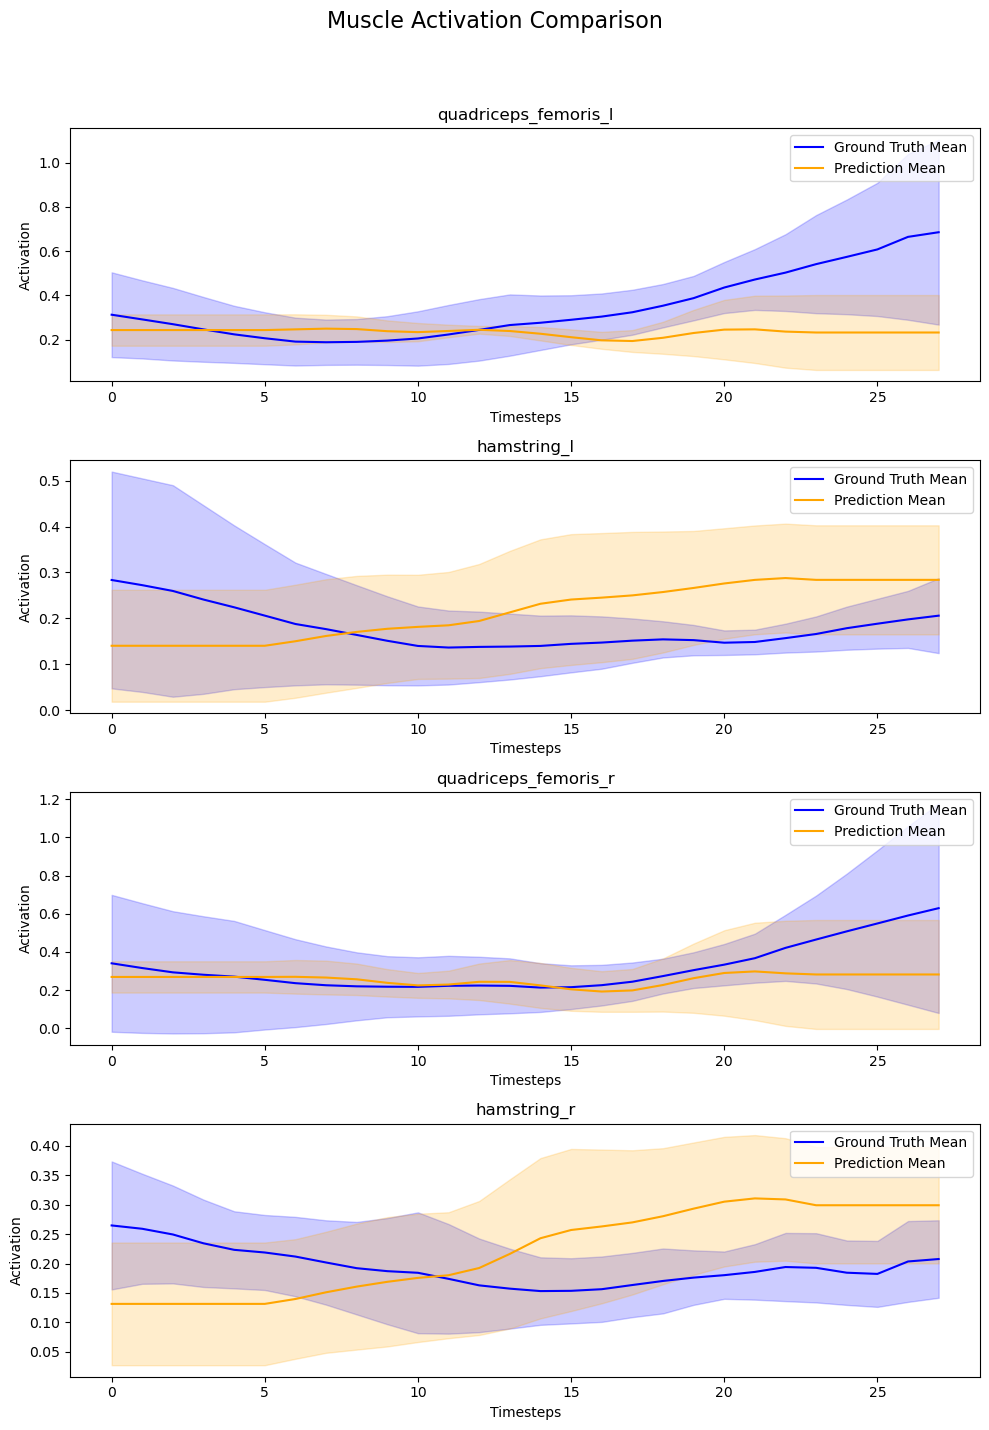

In [96]:
plot_muscle_activation(gt_data_match, avg_pred, keys=keys, mia_subset=MIA_SUBSET)